In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

In [4]:
# Load all CSVs
comments = pd.read_csv("C:\\Users\\mimadmin\\OneDrive\\Desktop\\comments.csv")
follows = pd.read_csv("C:\\Users\\mimadmin\\OneDrive\\Desktop\\follows.csv")
likes = pd.read_csv("C:\\Users\\mimadmin\\OneDrive\\Desktop\\likes.csv")
photo_tags = pd.read_csv("C:\\Users\\mimadmin\\OneDrive\\Desktop\\photo_tags.csv")
photos = pd.read_csv("C:\\Users\\mimadmin\\OneDrive\\Desktop\\photos.csv")
tags = pd.read_csv("C:\\Users\\mimadmin\\OneDrive\\Desktop\\tags.csv")
users = pd.read_csv("C:\\Users\\mimadmin\\OneDrive\\Desktop\\users.csv")

In [5]:
# Convert string dates to datetime objects
users['created time'] = pd.to_datetime(users['created time'], dayfirst=True, errors='coerce')
photos['created dat'] = pd.to_datetime(photos['created dat'], dayfirst=True, errors='coerce')

In [6]:
print("Total Users:", users.shape[0])
print("Total Photos:", photos.shape[0])
print("Total Likes:", likes.shape[0])
print("Total Comments:", comments.shape[0])

Total Users: 100
Total Photos: 257
Total Likes: 8782
Total Comments: 7488


C:\Users\mimadmin\AppData\Local\Temp\ipykernel_7640\2058755018.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=user_post_counts.head(10), x='photo count', y='name', palette='viridis')


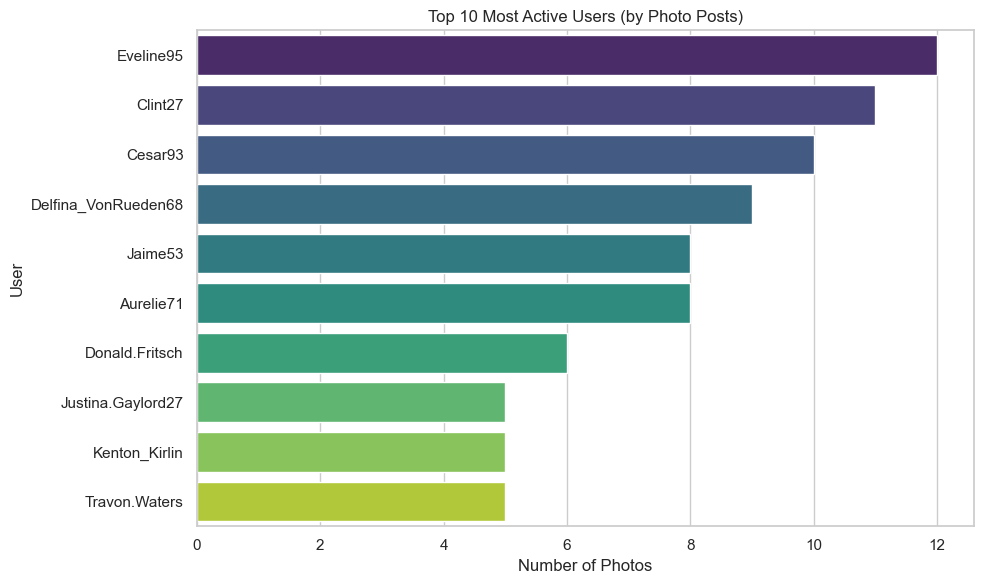

In [7]:
# Top users by photo count
user_post_counts = photos['user ID'].value_counts().reset_index()
user_post_counts.columns = ['user ID', 'photo count']
user_post_counts = user_post_counts.merge(users[['id', 'name']], left_on='user ID', right_on='id')

plt.figure(figsize=(10,6))
sns.barplot(data=user_post_counts.head(10), x='photo count', y='name', palette='viridis')
plt.title('Top 10 Most Active Users (by Photo Posts)')
plt.xlabel('Number of Photos')
plt.ylabel('User')
plt.tight_layout()
plt.show()

C:\Users\mimadmin\AppData\Local\Temp\ipykernel_7640\2975059138.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_liked, x='like count', y='photo ID', palette='magma')


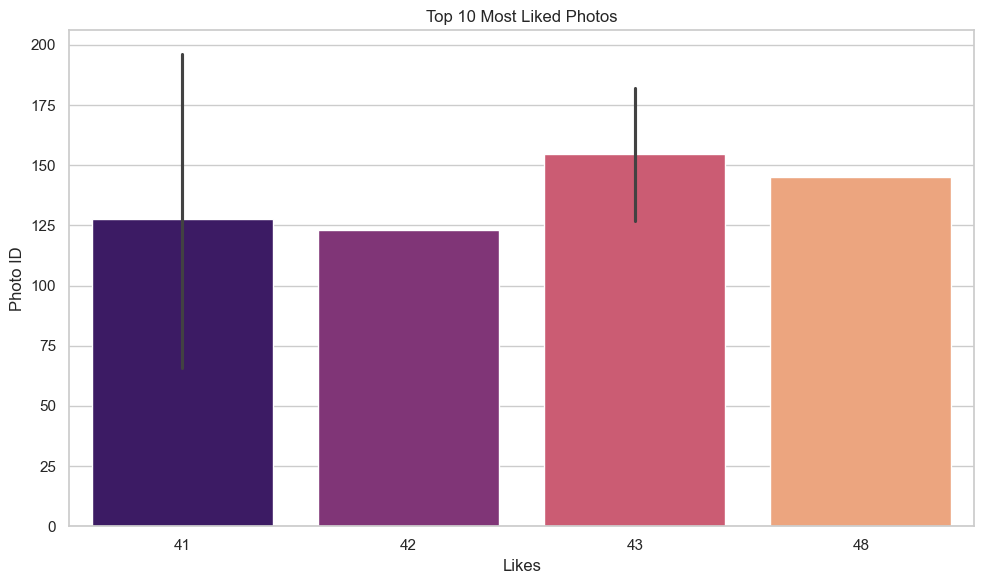

In [8]:
# Likes per photo
likes_per_photo = likes['photo'].value_counts().reset_index()
likes_per_photo.columns = ['photo ID', 'like count']
photos_likes = photos.merge(likes_per_photo, left_on='id', right_on='photo ID', how='left')
photos_likes['like count'] = photos_likes['like count'].fillna(0)

top_liked = photos_likes.sort_values('like count', ascending=False).head(10)
plt.figure(figsize=(10,6))
sns.barplot(data=top_liked, x='like count', y='photo ID', palette='magma')
plt.title('Top 10 Most Liked Photos')
plt.xlabel('Likes')
plt.ylabel('Photo ID')
plt.tight_layout()
plt.show()

C:\Users\mimadmin\AppData\Local\Temp\ipykernel_7640\909300033.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_commented, x='comment count', y='id', palette='cubehelix')


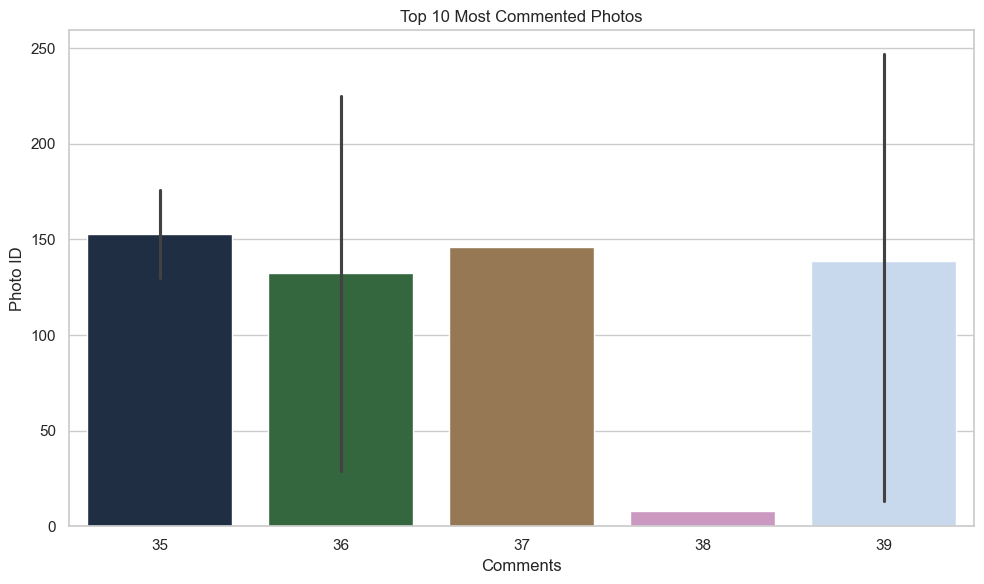

In [11]:
# Comments per photo
comments_per_photo = comments['Photo id'].value_counts().reset_index()
comments_per_photo.columns = ['Photo id', 'comment count']

# Merge comment counts with photos
photos_comments = photos.merge(comments_per_photo, left_on='id', right_on='Photo id', how='left')
photos_comments['comment count'] = photos_comments['comment count'].fillna(0)

# Sort and select top 10 most commented photos
top_commented = photos_comments.sort_values('comment count', ascending=False).head(10)

# Plot using the correct column (Photo id or just id)
plt.figure(figsize=(10,6))
sns.barplot(data=top_commented, x='comment count', y='id', palette='cubehelix')
plt.title('Top 10 Most Commented Photos')
plt.xlabel('Comments')
plt.ylabel('Photo ID')
plt.tight_layout()
plt.show()

C:\Users\mimadmin\AppData\Local\Temp\ipykernel_7640\1590932971.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=tag_counts.head(10), x='count', y='tag', palette='coolwarm')


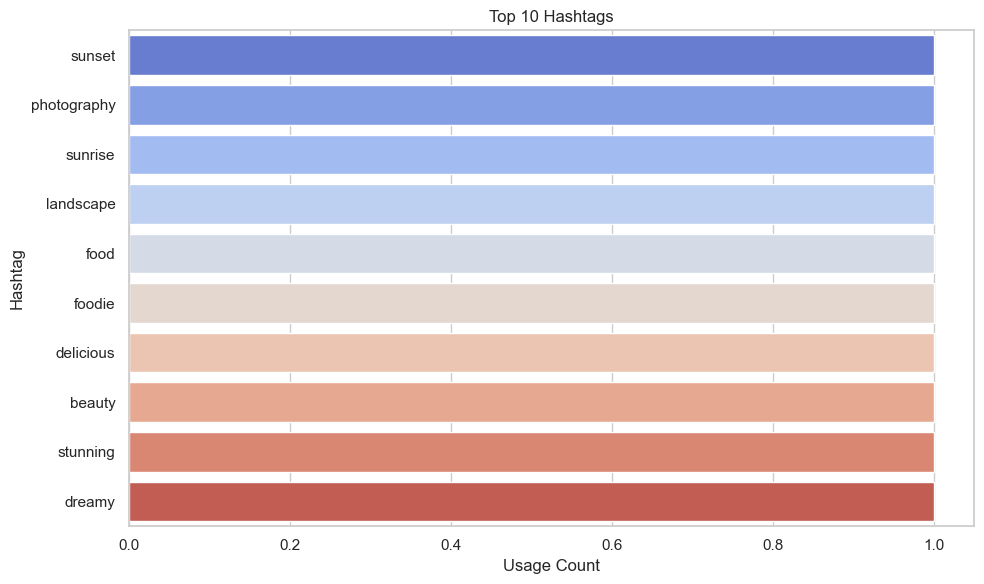

In [12]:
# Hashtag frequency
tag_counts = tags['tag text'].value_counts().reset_index()
tag_counts.columns = ['tag', 'count']

plt.figure(figsize=(10,6))
sns.barplot(data=tag_counts.head(10), x='count', y='tag', palette='coolwarm')
plt.title('Top 10 Hashtags')
plt.xlabel('Usage Count')
plt.ylabel('Hashtag')
plt.tight_layout()
plt.show()

C:\Users\mimadmin\AppData\Local\Temp\ipykernel_7640\1678336657.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=filter_counts.index, y=filter_counts.values, palette='Set2')


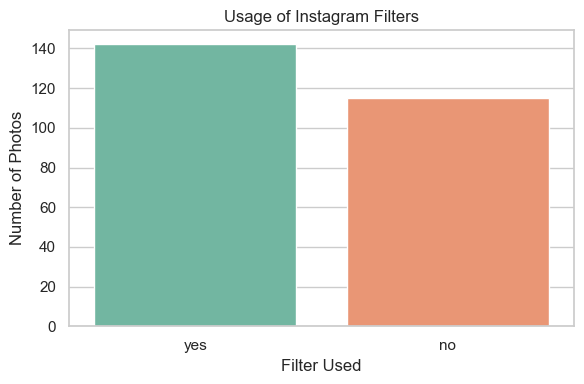

In [13]:
# Filter usage stats
filter_counts = photos['Insta filter used'].value_counts()

plt.figure(figsize=(6,4))
sns.barplot(x=filter_counts.index, y=filter_counts.values, palette='Set2')
plt.title('Usage of Instagram Filters')
plt.xlabel('Filter Used')
plt.ylabel('Number of Photos')
plt.tight_layout()
plt.show()

C:\Users\mimadmin\AppData\Local\Temp\ipykernel_7640\3562705826.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=verified_stats, x='Verified status', y='post count', palette='pastel')


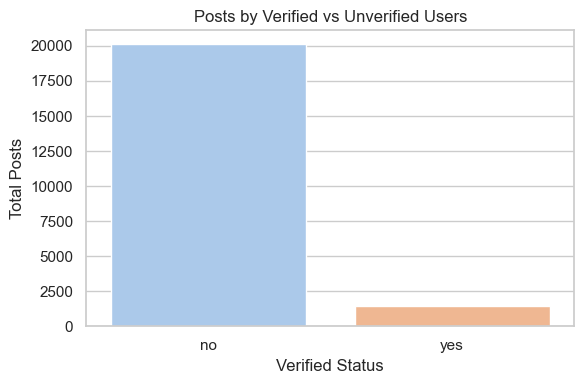

In [14]:
# Verified user activity
verified_stats = users.groupby('Verified status')['post count'].sum().reset_index()


plt.figure(figsize=(6,4))
sns.barplot(data=verified_stats, x='Verified status', y='post count', palette='pastel')
plt.title('Posts by Verified vs Unverified Users')
plt.xlabel('Verified Status')
plt.ylabel('Total Posts')
plt.tight_layout()
plt.show()